# Numerical methods for 2nd-order ODEs

We've gone over how to solve 1st-order ODEs using numerical methods, but what about 2nd-order or any higher-order ODEs? We can use the same methods we've already discussed by transforming our higher-order ODEs into a **system of first-order ODEs**.

Meaning, if we are given a 2nd-order ODE
\begin{equation}
\frac{d^2 y}{dx^2} = y^{\prime\prime} = f(x, y, y^{\prime})
\end{equation}
we can transform this into a system of **two 1st-order ODEs** that are coupled:
\begin{align}
\frac{dy}{dx} &= y^{\prime} = u \\
\frac{du}{dx} &= u^{\prime} = y^{\prime\prime} = f(x, y, u)
\end{align}
where $f(x, y, u)$ is the same as that given above for $\frac{d^2 y}{dx^2}$.

Thus, instead of a 2nd-order ODE to solve, we have two 1st-order ODEs:
\begin{align}
y^{\prime} &= u \\
u^{\prime} &= f(x, y, u)
\end{align}

So, we can use all of the methods we have talked about so far to solve 2nd-order ODEs by transforming the one equation into a system of two 1st-order equations.

## Higher-order ODEs

This works for higher-order ODEs too! For example, if we have a 3rd-order ODE, we can transform it into a system of three 1st-order ODEs:
\begin{align}
\frac{d^3 y}{dx^3} &= f(x, y, y^{\prime}, y^{\prime\prime}) \\
\rightarrow y^{\prime} &= u \\
u^{\prime} &= y^{\prime\prime} = w \\
w^{\prime} &= y^{\prime\prime\prime} = f(x, y, u, w)
\end{align}

## Example: mass-spring problem

For example, let's solve a forced damped mass-spring problem given by a 2nd-order ODE:
\begin{equation}
y^{\prime\prime} + 5y^{\prime} + 6y = 10 \sin \omega t
\end{equation}
with the initial conditions $y(0) = 0$ and $y^{\prime}(0) = 5$.

We start by transforming the equation into two 1st-order ODEs. Let's use the variables $z_1 = y$ and $z_2 = y^{\prime}$:
\begin{align}
\frac{dz_1}{dt} &= z_1^{\prime} = z_2 \\
\frac{dz_2}{dt} &= z_2^{\prime} = y^{\prime\prime} = 10 \sin \omega t - 5z_2 - 6z_1
\end{align}

### Forward Euler

Then, let's solve numerically using the forward Euler method. Recall that the recursion formula for forward Euler is:
\begin{equation}
y_{i+1} = y_i + \Delta x f(x_i, y_i)
\end{equation}
where $f(x,y) = \frac{dy}{dx}$.

Let's solve using $\omega = 1$ and with a step size of $\Delta t = 0.1$, over $0 \leq t \leq 3$.

We can compare this against the exact solution, obtainable using the method of undetermined coefficients:
\begin{equation}
y(t) = -6 e^{-3t} + 7 e^{-2t} + \sin t - \cos t
\end{equation}

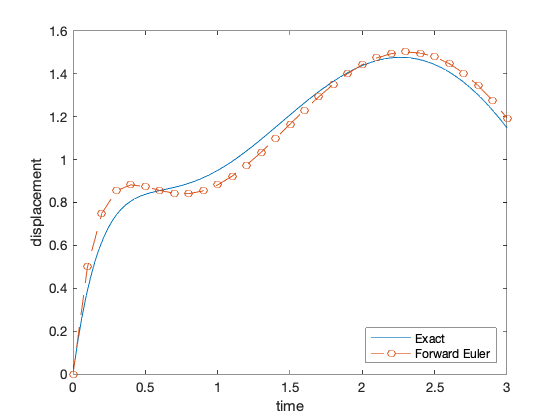

In [9]:
% plot exact solution first
t = linspace(0, 3);
y_exact = -6*exp(-3*t) + 7*exp(-2*t) + sin(t) - cos(t);
plot(t, y_exact); hold on

omega = 1;

dt = 0.1;
t = [0 : dt : 3];

f = @(t,z1,z2) 10*sin(omega*t) - 5*z2 - 6*z1;

z1 = zeros(length(t), 1);
z2 = zeros(length(t), 1);
z1(1) = 0;
z2(1) = 5;
for i = 1 : length(t)-1
    z1(i+1) = z1(i) + dt * z2(i);
    z2(i+1) = z2(i) + dt * f(t(i), z1(i), z2(i));
end

plot(t, z1, 'o--')
xlabel('time'); ylabel('displacement')
legend('Exact', 'Forward Euler', 'Location','southeast')

### Heun's Method

For schemes that involve more than one stage, like Heun's method, we'll need to implement both stages for each 1st-order ODE. For example:

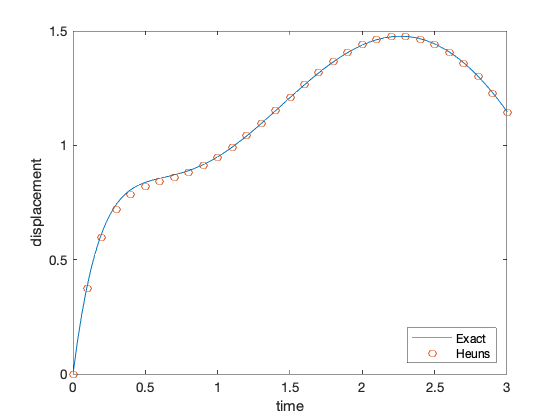

In [20]:
clear
% plot exact solution first
t = linspace(0, 3);
y_exact = -6*exp(-3*t) + 7*exp(-2*t) + sin(t) - cos(t);
plot(t, y_exact); hold on

omega = 1;

dt = 0.1;
t = [0 : dt : 3];

f = @(t,z1,z2) 10*sin(omega*t) - 5*z2 - 6*z1;

z1 = zeros(length(t), 1);
z2 = zeros(length(t), 1);
z1(1) = 0;
z2(1) = 5;
for i = 1 : length(t)-1
    % predictor
    z1p = z1(i) + z2(i)*dt;
    z2p = z2(i) + f(t(i), z1(i), z2(i))*dt;

    % corrector
    z1(i+1) = z1(i) + 0.5*dt*(z2(i) + z2p);
    z2(i+1) = z2(i) + 0.5*dt*(f(t(i), z1(i), z2(i)) + f(t(i+1), z1p, z2p));
end
plot(t, z1, 'o')
xlabel('time'); ylabel('displacement')
legend('Exact', 'Heuns', 'Location','southeast')

### Runge-Kutta: `ode45`

We can also solve using `ode45`, by providing a separate function file that defines the system of 1st-order ODEs. In this case, we'll need to use a single **array** variable, `Z`, to store $z_1$ and $z_2$. The first column of `Z` will store $z_1$ (`Z(:,1)`) and the second column will store $z_2$ (`Z(:,2)`).

In [10]:
%%file mass_spring.m
function dzdt = mass_spring(t, z)
    omega = 1;
    dzdt = zeros(2,1);
    
    dzdt(1) = z(2);
    dzdt(2) = 10*sin(omega*t) - 6*z(1) - 5*z(2);
end

Created file '/Users/kyle/projects/ME373/docs/mass_spring.m'.


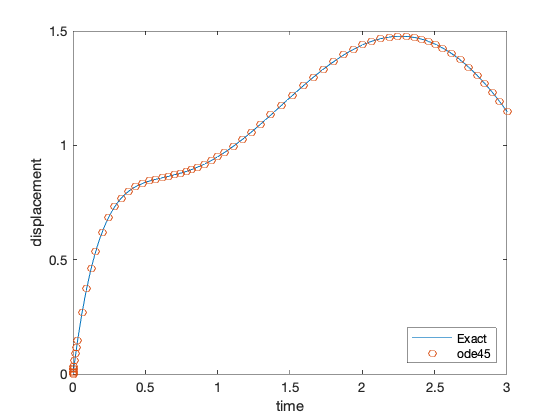

In [13]:
% plot exact solution first
t = linspace(0, 3);
y_exact = -6*exp(-3*t) + 7*exp(-2*t) + sin(t) - cos(t);
plot(t, y_exact); hold on

% solution via ode45:
[T, Z] = ode45('mass_spring', [0 3], [0 5]);

plot(T, Z(:,1), 'o')
xlabel('time'); ylabel('displacement')
legend('Exact', 'ode45', 'Location','southeast')

## Backward Euler for 2nd-order ODEs

We saw how to implement the Backward Euler method for a 1st-order ODE, but what about a 2nd-order ODE? (Or in general a system of 1st-order ODEs?)

The recursion formula is the same, except now our dependent variable is an array/vector:
\begin{equation}
\mathbf{y}_{i+1} = \mathbf{y}_i + \Delta t \, \mathbf{f} \left( t_{i+1} , \mathbf{y}_{i+1} \right)
\end{equation}
where the bolded $\mathbf{y}$ and $\mathbf{f}$ indicate array quantities (in other words, they hold more than one value).

In general, we can use Backward Euler to solve 2nd-order ODEs in a similar fashion as our other numerical methods:

1. Convert the 2nd-order ODE into a system of two 1st-order ODEs
2. Insert the ODEs into the Backward Euler recursion formula and solve for $\mathbf{y}_{i+1}$

The main difference is that we will now have a system of two equations and two unknowns: $y_{1, i+1}$ and $y_{2, i+1}$.

Let's demonstrate with an example:
\begin{equation}
y^{\prime\prime} + 6 y^{\prime} + 5y = 10 \quad y(0) = 0 \quad y^{\prime}(0) = 5
\end{equation}
where the exact solution is
\begin{equation}
y(t) = -\frac{3}{4} e^{-5t} - \frac{5}{4} e^{-t} + 2
\end{equation}

To solve numerically,

1. Convert the 2nd-order ODE into a system of two 1st-order ODEs:
\begin{gather}
y_1 = y \quad y_1(t=0) = 0 \\
y_2 = y^{\prime} \quad y_2 (t=0) = 5
\end{gather}
Then, for the derivatives of these variables:
\begin{align}
y_1^{\prime} &= y_2 \\
y_2^{\prime} &= 10 - 6 y_2 - 5 y_1
\end{align}

2. Then plug these derivatives into the Backward Euler recursion formulas and solve for $y_{1,i+1}$ and $y_{2,i+1}$:
\begin{align}
y_{1, i+1} &= y_{1, i} + \Delta t \, y_{2,i+1} \\
y_{2, i+1} &= y_{2, i} + \Delta t \left( 10 - 6 y_{2, i+1} - 5 y_{1,i+1} \right) \\
\\
y_{1, i+1} - \Delta t \, y_{2, i+1} &= y_{1,i} \\
5 \Delta t \, y_{1, i+1} + (1 + 6 \Delta t) y_{2, i+1} &= y_{2,i} + 10 \Delta t \\
\text{or} \quad 
\begin{bmatrix} 1 & -\Delta t \\ 5 \Delta t & (1+6\Delta t)\end{bmatrix} 
\begin{bmatrix} y_{1, i+1} \\ y_{2, i+1} \end{bmatrix} &= 
\begin{bmatrix} y_{1,i} \\ y_{2,i} + 10 \Delta t \\ \end{bmatrix} \\
\mathbf{A} \mathbf{y}_{i+1} &= \mathbf{b}
\end{align}
To isolate $\mathbf{y}_{i+1}$ and get a usable recursion formula, we need to solve this system of two equations. We could solve this by hand using the substitution method, or we can use Cramer's rule:
\begin{align}
y_{1, i+1} &= \frac{ y_{1,i} (1 + 6 \Delta t) + \Delta t \left( y_{2,i} + 10 \Delta t \right)}{1 + 6 \Delta t + 5 \Delta t^2} \\
y_{2, i+1} &= \frac{ y_{2,i} + 10 \Delta t - 5 \Delta t y_{1,i}}{1 + 6 \Delta t + 5 \Delta t^2}
\end{align}

Let's confirm that this gives us a good, well-behaved numerical solution and compare with the Forward Euler method:

Maximum error of Forward Euler: 0.099
Maximum error of Backward Euler: 0.068

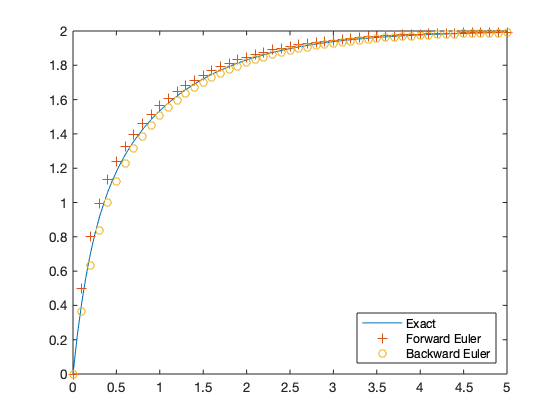

In [1]:
clear

% Exact solution
t = linspace(0, 5);
y_exact = @(t) -(3/4)*exp(-5*t) - (5/4)*exp(-t) + 2;
plot(t, y_exact(t)); hold on

dt = 0.1;
t = 0 : dt : 5;

% Forward Euler
f = @(t, y1, y2) 10 - 6*y2 - 5*y1;
y1 = zeros(length(t), 1); y2 = zeros(length(t), 1);
y1(1) = 0; y2(1) = 5;
for i = 1 : length(t) - 1
    y1(i+1) = y1(i) + dt*y2(i);
    y2(i+1) = y2(i) + dt*f(t(i), y1(i), y2(i));
end
plot(t, y1, '+')

Y = zeros(length(t), 2);
Y(1,1) = 0;
Y(1,2) = 5;
for i = 1 : length(t) - 1
    D = 1 + 6*dt + 5*dt^2;
    Y(i+1, 1) = (Y(i,1)*(1 + 6*dt) + dt*(Y(i,2) + 10*dt)) / D;
    Y(i+1, 2) = (Y(i,2) + 10*dt - Y(i,1)*5*dt) / D;
end
plot(t, Y(:,1), 'o')
legend('Exact', 'Forward Euler', 'Backward Euler', 'location', 'southeast')

fprintf('Maximum error of Forward Euler: %5.3f\n', max(abs(y1(:) - y_exact(t)')));
fprintf('Maximum error of Backward Euler: %5.3f', max(abs(Y(:,1) - y_exact(t)')));

So, for $\Delta t = 0.1$, we see that the Forward and Backward Euler methods give an error $\mathcal{O}(\Delta t)$, as expected since both methods are *first-order* accurate.

Let's see how they compare for a larger step size:

Maximum error of Forward Euler: 43.242
Maximum error of Backward Euler: 0.228

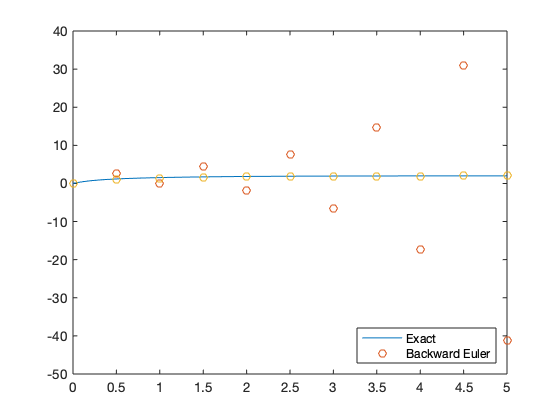

In [2]:
clear

% Exact solution
t = linspace(0, 5);
y_exact = @(t) -(3/4)*exp(-5*t) - (5/4)*exp(-t) + 2;
plot(t, y_exact(t)); hold on

dt = 0.5;
t = 0 : dt : 5;

% Forward Euler
f = @(t, y1, y2) 10 - 6*y2 - 5*y1;
y1 = zeros(length(t), 1); y2 = zeros(length(t), 1);
y1(1) = 0; y2(1) = 5;
for i = 1 : length(t) - 1
    y1(i+1) = y1(i) + dt*y2(i);
    y2(i+1) = y2(i) + dt*f(t(i), y1(i), y2(i));
end
plot(t, y1, 'o')

% Backward Euler

Y = zeros(length(t), 2);
Y(1,1) = 0;
Y(1,2) = 5;
for i = 1 : length(t) - 1
    D = 1 + 6*dt + 5*dt^2;
    Y(i+1, 1) = (Y(i,1)*(1 + 6*dt) + dt*(Y(i,2) + 10*dt)) / D;
    Y(i+1, 2) = (Y(i,2) + 10*dt - Y(i,1)*5*dt) / D;
end
plot(t, Y(:,1), 'o')
legend('Exact', 'Backward Euler', 'location', 'southeast')

%fprintf('Maximum error of Forward Euler: %5.3f\n', max(abs(y1(:) - y_exact(t)')));
%fprintf('Maximum error of Backward Euler: %5.3f', max(abs(Y(:,1) - y_exact(t)')));

fprintf('Maximum error of Forward Euler: %5.3f\n', max(abs(y1(:) - y_exact(t)')));
fprintf('Maximum error of Backward Euler: %5.3f', max(abs(Y(:,1) - y_exact(t)')));

Backward Euler, since it is unconditionally stable, remains well-behaved at this larger step size, while the Forward Euler method blows up.

One other thing: instead of using Cramer's rule to get expressions for $y_{1,i+1}$ and $y_{2,i+1}$, we could instead use Matlab to solve the linear system of equations at each time step. To do that, we could replace
```OCTAVE
A = [1  -dt; 5*dt  (1+6*dt)];
b = [Y(i,1); Y(i,2)+10*dt];
Y(i+1,:) = (A\b)';
```
where `A\b` is equivalent to `inv(A)*b`, but faster. Let's confirm that this gives the same answer:

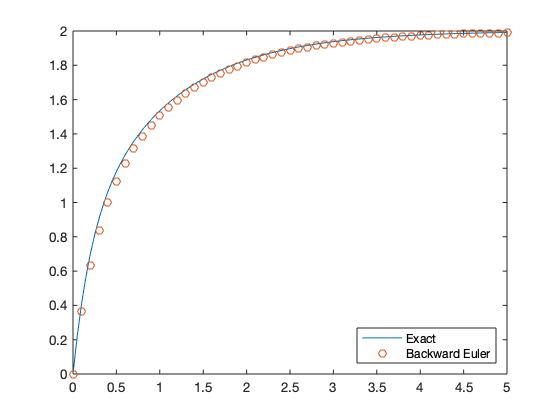

In [3]:
clear

% Exact solution
t = linspace(0, 5);
y_exact = @(t) -(3/4)*exp(-5*t) - (5/4)*exp(-t) + 2;
plot(t, y_exact(t)); hold on

dt = 0.1;
t = 0 : dt : 5;

Y = zeros(length(t), 2);
Y(1,1) = 0;
Y(1,2) = 5;
for i = 1 : length(t) - 1
    A = [1  -dt; 5*dt  (1+6*dt)];
    b = [Y(i,1); Y(i,2)+10*dt];
    Y(i+1,:) = (A\b)';
end
plot(t, Y(:,1), 'o')
legend('Exact', 'Backward Euler', 'location', 'southeast')

## Cramer's Rule

Cramer's Rule provides a solution method for a system of linear equations, where the number of equations equals the number of unknowns. It works for any number of equations/unknowns, but isn't really practical for more than two or three. We'll focus on using it for a system of two equations, with two unknowns $x_1$ and $x_2$:
\begin{gather}
a_{11} + x_1 + a_{12} x_2 = b_1 \\
a_{21} + x_1 + a_{22} x_2 = b_2 \\
\text{or } \mathbf{A} \mathbf{x} = \mathbf{b}
\end{gather}
where
\begin{gather}
\mathbf{A} = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix} \\
\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \\
\mathbf{b} = \begin{bmatrix} b_1 \\ b_2 \end{bmatrix}
\end{gather}

The solutions for the unknowns are then
\begin{align}
x_1 &= \frac{ \begin{vmatrix} b_1 & a_{12} \\ b_2 & a_{22} \end{vmatrix} }{D} = \frac{b_1 a_{22} - a_{12} b_2}{D} \\
x_2 &= \frac{ \begin{vmatrix} a_{11} & b_1 \\ a_{21} & b_2 \end{vmatrix} }{D} = \frac{a_{11} b_2 - b_1 a_{21}}{D}
\end{align}
where $D$ is the determinant of $\mathbf{A}$:
\begin{equation}
D = \det(\mathbf{A}) = \begin{vmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{vmatrix} = a_{11} a_{22} - a_{12} a_{21}
\end{equation}
This works as long as the determinant does not equal zero.